In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.gridspec as gridspec #Used for organizing figures
%matplotlib inline

In [2]:
g = 9.81
u_initial = 2
v_initial = -5
launch_angle = 60

dt = 0.02
t = np.arange(0, 2, dt)
nsteps = len(t)







In [3]:
def second_derivative_FD(g, u_initial, v_initial, nsteps, dt):
    
    f = -g*np.ones(nsteps)
    f[0] = u_initial
    f[1] = v_initial

    second_derivative = np.zeros(nsteps)
    second_derivative[0] = 1
    second_derivative[1] = -2
    second_derivative[2] = 1

    A  = toeplitz(second_derivative, np.zeros(nsteps))
    neumann_BC = np.ones(nsteps)
    neumann_BC[0] = 3/2*dt
    neumann_BC[1] = -2*dt
    neumann_BC[2] = 1/2*dt
    neumann_BC[3:] = 0
    A[0, :] = dt**2*A[0, :]
    A[1, :] = neumann_BC
    A = 1/dt**2*A
    soln = np.dot(np.linalg.inv(A), f)
    
    return soln

In [4]:
y_pos = second_derivative_FD(g, u_initial, v_initial*np.sin(np.deg2rad(launch_angle)), nsteps, dt)
x_pos = second_derivative_FD(0, 0, v_initial*np.cos(np.deg2rad(launch_angle)), nsteps, dt)



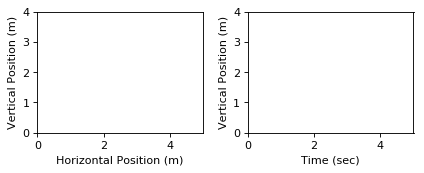

In [5]:
gs = gridspec.GridSpec(3, 3)



fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(gs[0, 0]) 
line, = ax.plot([], [], 'o', markersize = 4)
line2, = ax.plot([], [], 'o', markersize = 4, color = 'r')
line3, = ax.plot([], [], 'o', markersize = 4, color = 'k')
ax.set_xlim([0, int(np.max(x_pos))+1])
ax.set_ylim([0, int(np.max(y_pos))+2])
ax.set_xlabel('Horizontal Position (m)')
ax.set_ylabel('Vertical Position (m)')

ax1 = plt.subplot(gs[0, 1]) 
line1, = ax1.plot([], [], linestyle = '-', markersize = 4)
line4, = ax1.plot([], [], linestyle = '-', markersize = 4, color = 'r')
ax1.set_xlim([0, int(np.max(x_pos))+1])
ax1.set_ylim([0, int(np.max(y_pos))+2])
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Vertical Position (m)')

plt.tight_layout()







In [6]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    
    if y_pos[i] >= -0.1:
        
        x_fixed = np.zeros(len(y_pos))
        y_fixed = np.zeros(len(x_pos))
        y = y_pos[i]
        x = x_pos[i]
        t_int = t[i]
        line.set_data(x_fixed, y)
        line2.set_data(x, y_fixed)
        line3.set_data(x, y)
        line1.set_data(t[:i], y_pos[:i])
        line4.set_data(t[:i], x_pos[:i])
        
        
    return (line,)


In [7]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames= nsteps , interval=50, blit=True)

In [8]:
HTML(anim.to_html5_video())

